# Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import wordnet
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...


True

# Data set exploration

In [36]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

In [37]:
df_train

condition_label                                   medical_abstract
0                    5  Tissue changes around loose prostheses. A cani...
1                    1  Neuropeptide Y and neuron-specific enolase lev...
2                    2  Sexually transmitted diseases of the colon, re...
3                    1  Lipolytic factors associated with murine and h...
4                    3  Does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  Epirubicin at two dose levels with prednisolon...
11546                1  Four and a half year follow up of women with d...
11547                5  Safety of the transbronchial biopsy in outpati...
11548                3  Interictal spikes and hippocampal somatostatin...
11549                5  Recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

In [38]:
df_train["condition_label"].value_counts()/df_train.shape[0]*100

condition_label
5    33.281385
1    21.904762
4    21.134199
3    13.333333
2    10.346320
Name: count, dtype: float64

In [39]:
df_train.isnull().values.any()

False

In [40]:
len_abstracts = []
for index, row in df_train.iterrows():
    len_abstracts.append(len(row.medical_abstract))

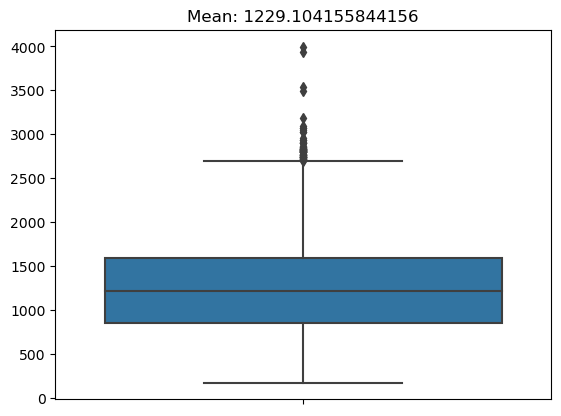

In [41]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [42]:
df_test

condition_label                                   medical_abstract
0                   3  Obstructive sleep apnea following topical orop...
1                   5  Neutrophil function and pyogenic infections in...
2                   5  A phase II study of combined methotrexate and ...
3                   1  Flow cytometric DNA analysis of parathyroid tu...
4                   4  Paraneoplastic vasculitic neuropathy: a treata...
...               ...                                                ...
2883                4  Management of aortobronchial fistula with graf...
2884                5  Tuberculous psoas muscle abscess following che...
2885                4  Clinical evaluation of high-frequency (ultraso...
2886                1  Antitumor activity of liposome-encapsulated do...
2887                4  An unusual venous anomaly of the placenta. The...

[2888 rows x 2 columns]

In [43]:
df_test["condition_label"].value_counts()/df_train.shape[0]*100

condition_label
5    8.320346
1    5.480519
4    5.281385
3    3.333333
2    2.588745
Name: count, dtype: float64

In [44]:
df_test.isnull().values.any()

False

In [45]:
len_abstracts = []
for index, row in df_test.iterrows():
    len_abstracts.append(len(row.medical_abstract))

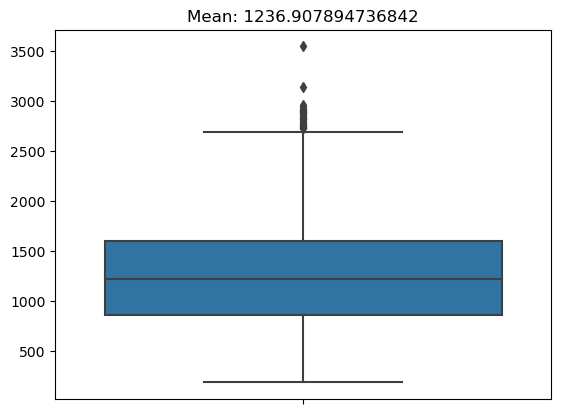

In [46]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [47]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

# Preprocessing 

In [48]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

## Whitespaces

In [49]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


In [50]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_test.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


## Case folding

In [51]:
newAbs = []
for index, row in df_train.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_train.medical_abstract = newAbs

In [52]:
newAbs = []
for index, row in df_test.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_test.medical_abstract = newAbs

## Punctuation

In [53]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [54]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_punctuation(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_punctuation(x))

In [55]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses a canin...
1                    1  neuropeptide y and neuronspecific enolase leve...
2                    2  sexually transmitted diseases of the colon rec...
3                    1  lipolytic factors associated with murine and h...
4                    3  does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  epirubicin at two dose levels with prednisolon...
11546                1  four and a half year follow up of women with d...
11547                5  safety of the transbronchial biopsy in outpati...
11548                3  interictal spikes and hippocampal somatostatin...
11549                5  recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

In [56]:
df_test

condition_label                                   medical_abstract
0                   3  obstructive sleep apnea following topical orop...
1                   5  neutrophil function and pyogenic infections in...
2                   5  a phase ii study of combined methotrexate and ...
3                   1  flow cytometric dna analysis of parathyroid tu...
4                   4  paraneoplastic vasculitic neuropathy a treatab...
...               ...                                                ...
2883                4  management of aortobronchial fistula with graf...
2884                5  tuberculous psoas muscle abscess following che...
2885                4  clinical evaluation of highfrequency ultrasoni...
2886                1  antitumor activity of liposomeencapsulated dox...
2887                4  an unusual venous anomaly of the placenta the ...

[2888 rows x 2 columns]

## Numbers

In [57]:
cont_number = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    cont_number += sum(c.isdigit() for c in text)
cont_number

230772

In [58]:
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        print(text)

tissue changes around loose prostheses a canine model to investigate the effects of an antiinflammatory agent the aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs the cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro the biologic response as determined by interleukin1 and prostaglandin e2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery the correlation between clinical roentgenographic histologic and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure a canine model permits the study of possible nonsurgical therapeutic interventions with the ultimate hope

downs syndrome and acute leukemia in children an analysis of phenotype by use of monoclonal antibodies and electron microscopic platelet peroxidase reaction the clinical hematologic and immunophenotypic features in 20 patients with downs syndrome ds and acute leukemia were analyzed of the 20 patients all 14 patients who were 3 years old and less were diagnosed as having acute megakaryoblastic leukemia amkl by use of plateletspecific monoclonal antibodies and platelet peroxidase ppo reaction in electron microscopy they were characterized by the presence of bone marrow fibrosis having a history of myelodysplastic syndrome mds and a poor response to chemotherapy only one patient has remained in continuous complete remission for more than 1 year acute leukemia in six patients who were older than 4 years was classified as common acute lymphoblastic leukemia antigen callapositive acute lymphoblastic leukemia all in one of six patients classified as all the leukemic blasts simultaneously expr

autoradiographic evaluation of monoclonal antibodies access to melanomaassociated antigens in melanoma xenografts autoradiography of nude mice bearing human malignant melanoma xenografts was performed to characterize the distribution pattern of radioiodinated antimelanoma monoclonal antibodies moab and fragments in macroscopic tumor nodules nonuniformity of radioactivity distribution was seen in all moabxenograft combinations the predominant patterns were marked deposition of radioactivity either in the periphery of nodules or in sharply delimited intratumoral foci these patterns were generated by limitations in the accessibility of melanoma tissue rather than gross necrosis or heterogeneity of antigen expression computeraided densitometry of autoradiograms was used to elaborate the difference of accumulation in intratumoral hot spots versus cold areas it was found that increasing uniformity was achieved by increasing the dose of moab ie intact igg injected whereas a reduction in the s

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




patterns of cervical lymph node metastasis from squamous carcinomas of the upper aerodigestive tract a consecutive series of 1081 previously untreated patients undergoing 1119 radical neck dissections rnds for squamous carcinoma of the head and neck was reviewed to study the patterns of nodal metastases primary tumors were located in the oral cavity in 501 patients in the oropharynx in 207 patients in the hypopharynx in 126 patients and in the larynx in 247 patients lymph node metastases were confirmed histologically in 82 of 776 therapeutic neck dissections and micrometastases were discovered in 33 of 343 elective rnds lymph node groups in the neck were described by levels i to v predominance of certain levels was seen for each primary site levels i ii and iii were at highest risk for metastasis from cancer of the oral cavity and levels ii iii and iv were at highest risk for metastasis from carcinomas of the oropharynx hypopharynx and larynx supramohyoid neck dissection clearing leve

cocaine babies the scourge of the 90s six cases of cocainerelated deaths of infants have covered the spectrum of potentially devastating effects they include an intrauterine death of a 35weekold fetus following acute maternal cocaine abuse anoxic encephalopathy at birth with 3 months vegetative survival from a similar episode traumatic compression asphyxia in a 4monthold infectious cardiomyopathy with heart failure in a twin at age 21 months following maternal cocaine abuse at birth malnutrition and dehydration in a 7weekold during continuing cocaine abuse by the parents and a teenage siblings cocaine lacing of a baby milk bottle ingested by his 6weekold brother all the cases had positive toxicological screening for cocaine or metabolites or both in the mother at delivery or in the infant at birth or both there were no instances of sudden infant death syndrome sids or crib death pathologic and toxicologic as well as birth developmental and social data are presented an integrated medica

In [59]:
cont_abs = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        cont_abs+= 1
cont_abs/df_train.shape[0]*100

82.45887445887445

82% of the training documents contain one number at least. They have high semantic within the context: mac13 tumor, dr4 positive patients

## Remove links

In [60]:
def remove_links(text):
    remove_https = re.sub(r'http\S+', ' ', text)
    remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [61]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_links(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_links(x))

In [62]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses a canin...
1                    1  neuropeptide y and neuronspecific enolase leve...
2                    2  sexually transmitted diseases of the colon rec...
3                    1  lipolytic factors associated with murine and h...
4                    3  does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  epirubicin at two dose levels with prednisolon...
11546                1  four and a half year follow up of women with d...
11547                5  safety of the transbronchial biopsy in outpati...
11548                3  interictal spikes and hippocampal somatostatin...
11549                5  recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

## Stop Words

In [63]:
cachedStopWords = stopwords.words("english")

In [64]:
def remSw(text):
    return ' '.join([word for word in text.split() if word not in cachedStopWords])


In [65]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remSw(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remSw(x))

In [66]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses canine ...
1                    1  neuropeptide neuronspecific enolase levels ben...
2                    2  sexually transmitted diseases colon rectum anu...
3                    1  lipolytic factors associated murine human canc...
4                    3  carotid restenosis predict increased risk late...
...                ...                                                ...
11545                1  epirubicin two dose levels prednisolone treatm...
11546                1  four half year follow women dyskaryotic cervic...
11547                5  safety transbronchial biopsy outpatients objec...
11548                3  interictal spikes hippocampal somatostatin lev...
11549                5  recurrent thoracic outlet syndrome first rib r...

[11550 rows x 2 columns]

## Tokenization

In [67]:
def tokenize(text):
    return WordPunctTokenizer().tokenize(text)

In [68]:
df_train['medical_abstract_token'] = df_train['medical_abstract'].apply(lambda x: tokenize(x))
df_test['medical_abstract_token'] = df_test['medical_abstract'].apply(lambda x: tokenize(x))

In [69]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  
0      [tissue, changes, around, loose, prostheses, c...  
1      [neuropeptide, neuronspecific, enolase, levels...  
2      [sexually, transmitted, diseases, colon, rectu...  
3      [lipolytic, factors, associated, murine, human...  
4      [carotid, restenosis, predict, increased, risk...  
...                                                  ...  
11545  [epirubicin, two, dose, levels, prednisolone, ...  
11546  [four, half, year, follow, women, dyskaryotic,...  
11547  [safety, transbronchial, biopsy, outpatients, ...  
11548  [interictal, spikes, hippocampal, somatostatin...  
11549  [recurrent, thoracic, outlet, syndrome, first,...  

[11550 rows x 3 columns]

## POS Tagging

In [70]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [71]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [72]:
def pos(tokens):
    return nltk.pos_tag(tokens, tagset='universal')

In [73]:
df_train['medical_abstract_pos'] = df_train['medical_abstract_token'].apply(lambda x: pos(x))
df_test['medical_abstract_pos'] = df_test['medical_abstract_token'].apply(lambda x: pos(x))

In [74]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, two, dose, levels, prednisolone, ...   
11546  [four, half, year, follow, women, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...  
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...  
2      [(sexually, ADV), (transmitted, VERB), (diseas...  
3      [(lipolytic, ADJ), (factors, NOUN), (associate...  
4      [(carotid, NOUN), (restenosis, NOUN), (predict...  
...                                                  ...  
11545  [(epirubicin, ADV), (two, NUM), (dose, ADJ), (...  
11546  [(four, NUM), (half, NOUN), (year, NOUN), (fol...  
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...  
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...  
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...  

[11550 rows x 4 columns]

## Lemmatization

In [75]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def lemmatize_sentence(tagged_sentence):
    lemmatized_sentence = []
    for word, tag in tagged_sentence:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            if(get_wordnet_pos(tag) != ''):
                lemmatized_sentence.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
            else:
                lemmatized_sentence.append(word)
    return lemmatized_sentence

In [78]:
df_train['medical_abstract_lemma_token'] = df_train['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))
df_test['medical_abstract_lemma_token'] = df_test['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))

In [79]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, two, dose, levels, prednisolone, ...   
11546  [four, half, year, follow, women, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, ADV), (two, NUM), (dose, ADJ), (...   
11546  [(four, NUM), (half, NOUN), (year, NOUN), (fol...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  
0      [tissue, change, around, loose, prosthesis, ca...  
1      [neuropeptide, neuronspecific, enolase, level,...  
2      [sexually, transmit, disease, colon, rectum, a...  
3      [lipolytic, factor, associate, murine, human, ...  
4      [carotid, restenosis, predict, increase, risk,...  
...                                                  ...  
11545  [epirubicin, two, dose, level, prednisolone, t...  
11546  [four, half, year, follow, woman, dyskaryotic,...  
11547  [safety, transbronchial, biopsy, outpatient, o...  
11548  [interictal, spike, hippocampal, somatostatin,...  
11549  [recurrent, thoracic, outlet, syndrome, first,...  

[11550 rows x 5 columns]

## Merge processed tokens

In [80]:
def merge(tokens):
    return " ".join(tokens)

In [81]:
df_train['medical_abstract_lemma'] = df_train['medical_abstract_lemma_token'].apply(lambda x: merge(x))
df_test['medical_abstract_lemma'] = df_test['medical_abstract_lemma_token'].apply(lambda x: merge(x))

In [82]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, two, dose, levels, prednisolone, ...   
11546  [four, half, year, follow, women, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, ADV), (two, NUM), (dose, ADJ), (...   
11546  [(four, NUM), (half, NOUN), (year, NOUN), (fol...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  \
0      [tissue, change, around, loose, prosthesis, ca...   
1      [neuropeptide, neuronspecific, enolase, level,...   
2      [sexually, transmit, disease, colon, rectum, a...   
3      [lipolytic, factor, associate, murine, human, ...   
4      [carotid, restenosis, predict, increase, risk,...   
...                                                  ...   
11545  [epirubicin, two, dose, level, prednisolone, t...   
11546  [four, half, year, follow, woman, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatient, o...   
11548  [interictal, spike, hippocampal, somatostatin,...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                  medical_abstract_lemma  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually transmit disease colon rectum anus ch...  
3      lipolytic factor associate murine human cancer...  
4      carotid restenosis predict increase risk late ...  
...                                                  ...  
11545  epirubicin two dose level prednisolone treatme...  
11546  four half year follow woman dyskaryotic cervic...  
11547  safety transbronchial biopsy outpatient object...  
11548  interictal spike hippocampal somatostatin leve...  
11549  recurrent thoracic outlet syndrome first rib r...  

[11550 rows x 6 columns]

In [83]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii study combined methotrexate teniposid...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     [obstructive, sleep, apnea, following, topical...   
1     [neutrophil, function, pyogenic, infections, b...   
2     [phase, ii, study, combined, methotrexate, ten...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, followin...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, authors, ...   

                                   medical_abstract_pos  \
0     [(obstructive, ADJ), (sleep, ADJ), (apnea, NOU...   
1     [(neutrophil, ADJ), (function, NOUN), (pyogeni...   
2     [(phase, NOUN), (ii, NOUN), (study, NOUN), (co...   
3     [(flow, NOUN), (cytometric, NOUN), (dna, NOUN)...   
4     [(paraneoplastic, ADJ), (vasculitic, ADJ), (ne...   
...                                                 ...   
2883  [(management, NOUN), (aortobronchial, ADJ), (f...   
2884  [(tuberculous, ADJ), (psoas, NOUN), (muscle, N...   
2885  [(clinical, ADJ), (evaluation, NOUN), (highfre...   
2886  [(antitumor, NOUN), (activity, NOUN), (liposom...   
2887  [(unusual, ADJ), (venous, ADJ), (anomaly, NOUN...   

                           medical_abstract_lemma_token  \
0     [obstructive, sleep, apnea, follow, topical, o...   
1     [neutrophil, function, pyogenic, infection, bo...   
2     [phase, ii, study, combine, methotrexate, teni...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, follow, ...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, author, p...   

                                 medical_abstract_lemma  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii study combine methotrexate teniposide...  
3     flow cytometric dna analysis parathyroid tumor...  
4     paraneoplastic vasculitic neuropathy treatable...  
...                                                 ...  
2883  management aortobronchial fistula graft replac...  
2884  tuberculous psoas muscle abscess follow chemop...  
2885  clinical evaluation highfrequency ultrasonic m...  
2886  antitumor activity liposomeencapsulated doxoru...  
2887  unusual venous anomaly placenta author present...  

[2888 rows x 6 columns]

## Save preprocessed dataframes

In [84]:
df_train.to_csv("./dataset/medical_tc_train_preprocessed.csv")
df_test.to_csv("./dataset/medical_tc_test_preprocessed.csv")

In [85]:
len_abstracts = []
for index, row in df_train.iterrows():
    len_abstracts.append(len(row.medical_abstract_lemma))

From 1229 and 1236 to 917 and 922

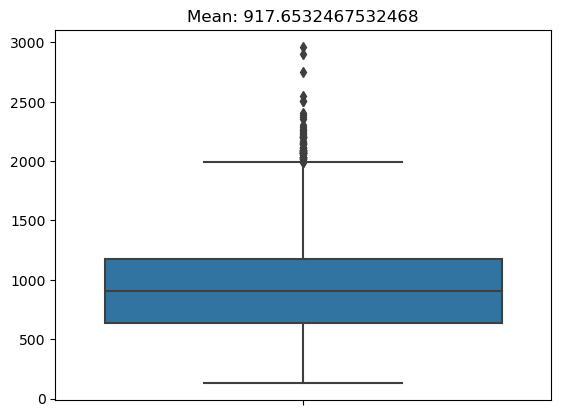

In [86]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [87]:
len_abstracts = []
for index, row in df_test.iterrows():
    len_abstracts.append(len(row.medical_abstract_lemma))

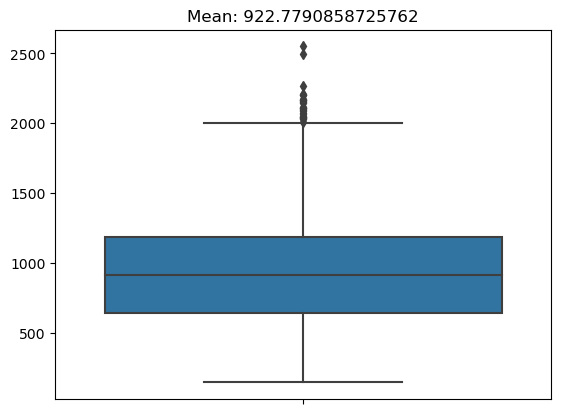

In [88]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

# Document representation

Dalle slide, parla nello specifico per la classificazione, mentre per il clustering non dice nulla di particolare:
1. Feature extraction
    - Per la classificazione by topic (la nostra) il modo più semplice è fare un BoW (es. TF-IDF).
    - Altra opzione: N-gram.
    - Altra opzione: word embeddings (Word2Vec, GloVe, and FastText). La SVD non è suggerita.
    - Altra opzione: contextualized word embeddings (BERT) che richiede pre-processing aggiuntivi (vedi slide).
    
2. Feature selection/Synthesis
    - Synthesis (PCA, SVD, LSA) --> non lo facciamo se si usa un word embedding!!!
    
3. Feature weighting
    - Skippabile



Io direi di provare due diverse rappresentazioni: un word embedding classico (Glove) e uno contextualized (BERT)
Bert requisiti:
- Special tokens: Add [CLS] and [SEP] tokens at the beginning and end of each text for BERT-style models.
- Padding: Ensure that all sequences are of the same length by padding or truncating as needed.

In [89]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [90]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      ['tissue', 'changes', 'around', 'loose', 'pros...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmitted', 'diseases', 'colon...   
3      ['lipolytic', 'factors', 'associated', 'murine...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
11545  ['epirubicin', 'two', 'dose', 'levels', 'predn...   
11546  ['four', 'half', 'year', 'follow', 'women', 'd...   
11547  ['safety', 'transbronchial', 'biopsy', 'outpat...   
11548  ['interictal', 'spikes', 'hippocampal', 'somat...   
11549  ['recurrent', 'thoracic', 'outlet', 'syndrome'...   

                                    medical_abstract_pos  \
0      [('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...   
1      [('neuropeptide', 'ADV'), ('neuronspecific', '...   
2      [('sexually', 'ADV'), ('transmitted', 'VERB'),...   
3      [('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...   
4      [('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...   
...                                                  ...   
11545  [('epirubicin', 'ADV'), ('two', 'NUM'), ('dose...   
11546  [('four', 'NUM'), ('half', 'NOUN'), ('year', '...   
11547  [('safety', 'NOUN'), ('transbronchial', 'ADJ')...   
11548  [('interictal', 'ADJ'), ('spikes', 'NOUN'), ('...   
11549  [('recurrent', 'NOUN'), ('thoracic', 'NOUN'), ...   

                            medical_abstract_lemma_token  \
0      ['tissue', 'change', 'around', 'loose', 'prost...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmit', 'disease', 'colon', '...   
3      ['lipolytic', 'factor', 'associate', 'murine',...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
11545  ['epirubicin', 'two', 'dose', 'level', 'predni...   
11546  ['four', 'half', 'year', 'follow', 'woman', 'd...   
11547  ['safety', 'transbronchial', 'biopsy', 'outpat...   
11548  ['interictal', 'spike', 'hippocampal', 'somato...   
11549  ['recurrent', 'thoracic', 'outlet', 'syndrome'...   

                                  medical_abstract_lemma  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually transmit disease colon rectum anus ch...  
3      lipolytic factor associate murine human cancer...  
4      carotid restenosis predict increase risk late ...  
...                                                  ...  
11545  epirubicin two dose level prednisolone treatme...  
11546  four half year follow woman dyskaryotic cervic...  
11547  safety transbronchial biopsy outpatient object...  
11548  interictal spike hippocampal somatostatin leve...  
11549  recurrent thoracic outlet syndrome first rib r...  

[11550 rows x 6 columns]

In [91]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii study combined methotrexate teniposid...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     ['obstructive', 'sleep', 'apnea', 'following',...   
1     ['neutrophil', 'function', 'pyogenic', 'infect...   
2     ['phase', 'ii', 'study', 'combined', 'methotre...   
3     ['flow', 'cytometric', 'dna', 'analysis', 'par...   
4     ['paraneoplastic', 'vasculitic', 'neuropathy',...   
...                                                 ...   
2883  ['management', 'aortobronchial', 'fistula', 'g...   
2884  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
2885  ['clinical', 'evaluation', 'highfrequency', 'u...   
2886  ['antitumor', 'activity', 'liposomeencapsulate...   
2887  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                   medical_abstract_pos  \
0     [('obstructive', 'ADJ'), ('sleep', 'ADJ'), ('a...   
1     [('neutrophil', 'ADJ'), ('function', 'NOUN'), ...   
2     [('phase', 'NOUN'), ('ii', 'NOUN'), ('study', ...   
3     [('flow', 'NOUN'), ('cytometric', 'NOUN'), ('d...   
4     [('paraneoplastic', 'ADJ'), ('vasculitic', 'AD...   
...                                                 ...   
2883  [('management', 'NOUN'), ('aortobronchial', 'A...   
2884  [('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...   
2885  [('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...   
2886  [('antitumor', 'NOUN'), ('activity', 'NOUN'), ...   
2887  [('unusual', 'ADJ'), ('venous', 'ADJ'), ('anom...   

                           medical_abstract_lemma_token  \
0     ['obstructive', 'sleep', 'apnea', 'follow', 't...   
1     ['neutrophil', 'function', 'pyogenic', 'infect...   
2     ['phase', 'ii', 'study', 'combine', 'methotrex...   
3     ['flow', 'cytometric', 'dna', 'analysis', 'par...   
4     ['paraneoplastic', 'vasculitic', 'neuropathy',...   
...                                                 ...   
2883  ['management', 'aortobronchial', 'fistula', 'g...   
2884  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
2885  ['clinical', 'evaluation', 'highfrequency', 'u...   
2886  ['antitumor', 'activity', 'liposomeencapsulate...   
2887  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                 medical_abstract_lemma  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii study combine methotrexate teniposide...  
3     flow cytometric dna analysis parathyroid tumor...  
4     paraneoplastic vasculitic neuropathy treatable...  
...                                                 ...  
2883  management aortobronchial fistula graft replac...  
2884  tuberculous psoas muscle abscess follow chemop...  
2885  clinical evaluation highfrequency ultrasonic m...  
2886  antitumor activity liposomeencapsulated doxoru...  
2887  unusual venous anomaly placenta author present...  

[2888 rows x 6 columns]

## Word2Vec

In [92]:
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in df_train['medical_abstract_lemma']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [93]:
import numpy as np
def vectorize(sentence): 
  words = sentence.split() 
  words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv] 
  if len(words_vecs) == 0: 
    return np.zeros(100) 
  words_vecs = np.array(words_vecs) 
  return words_vecs.mean(axis=0)

df_train_vectorized = np.array([vectorize(sentence) for sentence in df_train['medical_abstract_lemma']])
df_test_vectorized = np.array([vectorize(sentence) for sentence in df_test['medical_abstract_lemma']])

In [94]:
df_train_vectorized

array([[ 0.24266492, -0.01580901,  0.11839558, ..., -0.17590022,
         0.03191917, -0.11140752],
       [-0.594837  ,  0.12713484, -0.24006931, ...,  0.09999671,
         0.02400279,  0.00924601],
       [-0.52304506,  0.813759  ,  0.2091182 , ..., -0.08438971,
        -0.12712117, -0.02298658],
       ...,
       [-0.14110002,  0.26114574,  0.3106515 , ..., -0.40666872,
        -0.05522797,  0.06702472],
       [-0.19668628,  0.07448329, -0.24309856, ..., -0.03683178,
        -0.06031661, -0.10697911],
       [-0.38824418,  0.22881663,  0.4725728 , ..., -0.17072289,
        -0.10500015,  0.02677277]], dtype=float32)

In [95]:
df_train_vectorized.shape

(11550, 100)

In [96]:
df_test_vectorized.shape

(2888, 100)

## Save vectorized dataframes

In [97]:
pd.DataFrame(df_train_vectorized).to_csv("./dataset/medical_tc_train_vectorized.csv")
pd.DataFrame(df_test_vectorized).to_csv("./dataset/medical_tc_test_vectorized.csv")

# Classification

In [98]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized.csv", index_col = 0)

In [99]:
df_train_vectorized.shape

(11550, 100)

In [100]:
df_train_vectorized

0         1         2         3         4         5         6  \
0      0.242665 -0.015809  0.118396 -0.006151  0.199028 -0.469962 -0.322827   
1     -0.594837  0.127135 -0.240069  0.064153  0.217936 -0.364707  0.015760   
2     -0.523045  0.813759  0.209118  0.008421  0.466376 -0.304509 -0.213953   
3     -0.474657  0.183279 -0.061325 -0.173678  0.470891 -0.695219 -0.176015   
4     -0.347801  0.007106  0.151308 -0.360237 -0.188126 -0.672033 -0.161899   
...         ...       ...       ...       ...       ...       ...       ...   
11545 -0.161827  0.182955  0.541174 -0.132587  0.062257 -0.190241 -0.266747   
11546 -0.529577  0.170994  0.403101 -0.229029 -0.083821 -0.801098 -0.493721   
11547 -0.141100  0.261146  0.310652 -0.079886  0.093372 -0.458087 -0.188734   
11548 -0.196686  0.074483 -0.243099 -0.049145  0.167655 -0.599087 -0.144307   
11549 -0.388244  0.228817  0.472573 -0.183215 -0.052308 -0.502745 -0.242859   

              7         8         9  ...        90        91        92  \
0      1.044690  0.182026 -0.328453  ...  0.368174 -0.249818  0.318724   
1      0.909633 -0.054295 -0.231452  ...  0.414818  0.264156  0.293178   
2      0.385913  0.183517  0.017630  ...  0.548116  0.191434  0.057431   
3      0.994787  0.261910 -0.506524  ...  0.581542  0.221601  0.250200   
4     -0.059053 -0.259596 -0.426816  ...  0.822668  0.589533 -0.446150   
...         ...       ...       ...  ...       ...       ...       ...   
11545  0.230925 -0.481695 -0.287200  ...  0.614882  0.439471  0.031097   
11546  0.094689 -0.234806 -0.468768  ...  0.678302  0.398425  0.051253   
11547 -0.025785 -0.572046 -0.095726  ...  0.493514  0.284914 -0.130907   
11548  0.737981  0.031384 -0.258453  ...  0.274851 -0.103356  0.176922   
11549 -0.048457 -0.410013 -0.408522  ...  0.558855  0.596347 -0.286520   

             93        94        95        96        97        98        99  
0      0.126866  0.654166 -0.213641  0.071663 -0.175900  0.031919 -0.111408  
1     -0.076197  0.184110  0.045979  0.254470  0.099997  0.024003  0.009246  
2      0.013699  0.196082  0.381663 -0.154065 -0.084390 -0.127121 -0.022987  
3      0.016668  0.229857  0.091705  0.095268  0.251918 -0.196158 -0.359551  
4     -0.049762 -0.329039  0.392536 -0.230620 -0.673946 -0.159948 -0.084246  
...         ...       ...       ...       ...       ...       ...       ...  
11545  0.219842  0.238980  0.277039 -0.140583 -0.125570 -0.334157 -0.352336  
11546  0.130823  0.138194  0.388375 -0.069308 -0.109242 -0.295043 -0.111934  
11547  0.107014  0.107317  0.325041 -0.181271 -0.406669 -0.055228  0.067025  
11548  0.020488  0.552110  0.018086  0.277604 -0.036832 -0.060317 -0.106979  
11549  0.016030 -0.105582  0.331732  0.074372 -0.170723 -0.105000  0.026773  

[11550 rows x 100 columns]

# Clustering